# C++ Branch and Bound with Python DefaultUserCallbacks

This implementation shall allow us to quickly implement new ideas an check the performance.
The branch and bound is implemented in reasonably fast C++, while PyBind11 allows us to not only call it but also to add lower and upper bounds via a callback that is called at every node.

In [1]:
# import the stuff
from cetsp.core import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution

In [2]:
# create a simple instance

import random
circles = [Circle(Point(x*(1+random.random()), y*(1+random.random())), 1) for x in range(7) for y in range(7)]
instance = Instance(circles[:20], Point(0,0), Point(10,10))
instance_ = Instance(circles, Point(0,0), Point(10,10))

## Initial Solution

Branch and Bound can benefit from a good upper bound. However, it is also pretty quick in finding good solutions so probably it is more promising to go for lower bounds.

In [3]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance_)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


In [4]:
def cb(context):
    if context.current_node.is_feasible():
        traj = context.current_node.get_relaxed_solution()
        for c in circles:
            if not traj.distance(c) <= 0.01:
                print("lazy add c")
                context.add_lazy_circle(c)
        ub = context.get_upper_bound()
        print(f"Found a new solution! The currently best solution has a value of {ub}.")
        
timelimit = 60
opt_solution = branch_and_bound(instance, cb, initial_solution, timelimit)

i	LB	|	UB
0	18.0958	|	62.3996
1	18.2249	|	62.3996
2	18.2249	|	62.3996
3	18.2249	|	62.3996
4	18.2249	|	62.3996
5	18.2249	|	62.3996
6	18.2249	|	62.3996
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
Found a new solution! The currently best solution has a value of 62.39959822831909.
7	18.2249	|	62.3996
8	18.2249	|	62.3996
9	18.2249	|	62.3996
10	18.2249	|	62.3996
20	18.2249	|	62.3996
lazy add c
lazy add c
Found a new solution! The currently best solution has a value of 62.39959822831909.
Found a new solution! The currently best solution has a value of 62.39959822831909.
30	18.2249	|	41.5087
40	18.2249	|	41.5087
50	18.2249	|	41.5087
60	18.2249	|	41.5087
70	18.2249	|	41.5087
80	18.2249	|	41.5087
90	18.2249	|	41.5087
100	18.2249	|	41.5087
200	18.2249	|	41.50

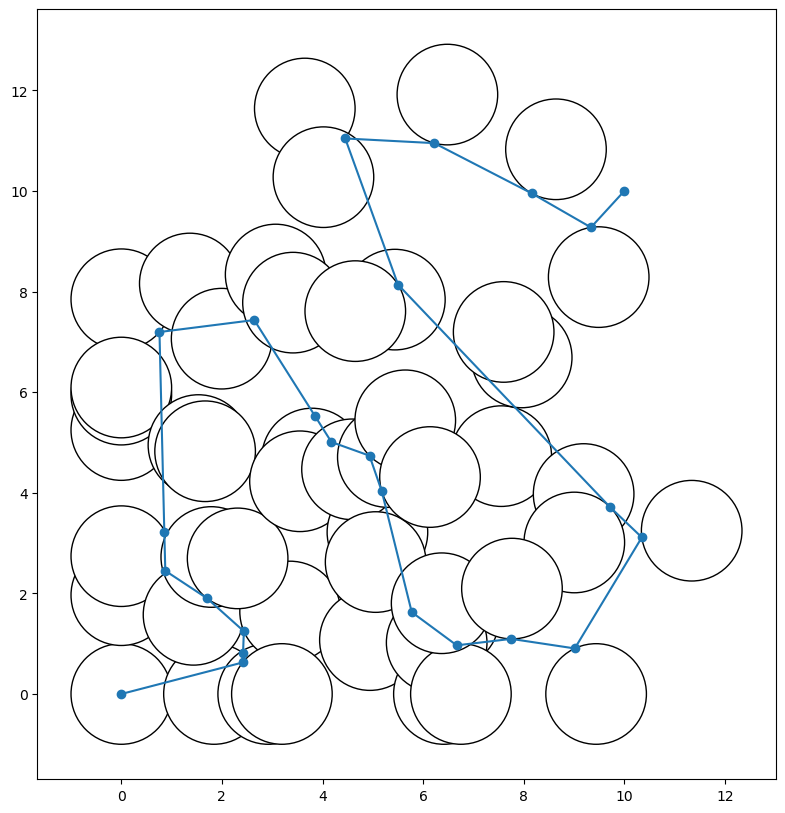

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_solution(plt.gca(), instance_, opt_solution)

## Getting data and manipulating the nodes via callback.

The user_callbacks allow us to access a lot of data and we can use it to influence the BnB in most ways.

The following example does some useless things just to show off. Note how the lower bound gets higher because of this (the lower bound is bad because of the manipulation).

In [ ]:
def cb(context):
    order = context.current_node.get_fixed_sequence()
    if len(order)>3 and order[1]<order[2]:  # useless abort if order[1] has a lower index than order[2]
        context.current_node.prune()
        return
    
    if context.current_node.is_feasible():
        ub = context.get_upper_bound()
        obj = context.current_node.get_relaxed_solution().length()
        print(f"Found a new solution of value {obj}! The currently best solution has a value of {ub}.")
        order = context.current_node.get_fixed_sequence()
        print(f"Its sequence is {order}")
    else:
        context.current_node.add_lower_bound(context.current_node.get_lower_bound()*1.05)  # increasing the lb by the relaxation by 5% (also a stupid idea)
        
        
timelimit = 60
opt_solution = branch_and_bound(instance_, cb , initial_solution, timelimit)

i	LB	|	UB
0	26.2151	|	62.3996
1	26.2251	|	62.3996
2	26.2251	|	62.3996
3	26.2251	|	62.3996
4	26.2251	|	62.3996
5	26.2251	|	62.3996
6	26.2251	|	62.3996
7	26.2251	|	62.3996
8	26.2251	|	62.3996
9	26.2251	|	62.3996
10	26.2251	|	62.3996
20	26.2251	|	62.3996
Found a new solution of value 43.41139745384495! The currently best solution has a value of 62.39959822831909.
Its sequence is [35, 45, 37, 43, 44, 32, 39, 17, 30, 15, 8, 1, 2, 3, 12, 4, 33, 20, 41, 26, 47, 34, 40, 48]
30	26.2251	|	43.4114
40	26.2251	|	43.4114
50	26.2251	|	43.4114
Found a new solution of value 43.41139716209627! The currently best solution has a value of 43.41139745384495.
Its sequence is [35, 45, 37, 44, 43, 32, 39, 17, 30, 15, 8, 1, 2, 3, 12, 4, 33, 20, 41, 26, 47, 34, 40, 48]
60	26.2251	|	43.4114
70	26.2251	|	43.4114
80	26.2251	|	43.4114
90	26.2251	|	43.4114
100	26.2251	|	43.4114
200	26.2251	|	43.4114
300	26.2251	|	43.4114
400	26.2251	|	43.4114
500	26.2251	|	43.4114
600	26.2251	|	43.4114
700	26.2251	|	43.4114
Found a n

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_solution(plt.gca(), instance_, opt_solution)